In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

glendive us
hermanus za
thompson ca
grindavik is
umm durman sd
saint-joseph re
talara pe
hamilton bm
kampene cd
sabha ly
suez eg
rikitea pf
bredasdorp za
punta arenas cl
taolanaro mg
carnarvon au
narsaq gl
upernavik gl
presidencia roque saenz pena ar
kabanjahe id
nikolskoye ru
ushuaia ar
eisenhuttenstadt de
barentsburg sj
rikitea pf
lolua tv
kapaa us
ushuaia ar
north bend us
chateauneuf-les-martigues fr
atuona pf
mataura pf
okhotsk ru
hirara jp
new norfolk au
hermanus za
tasiilaq gl
mount gambier au
kazerun ir
fare pf
lolua tv
harper lr
cumaribo co
east london za
gornopravdinsk ru
rikitea pf
hithadhoo mv
maykain kz
port alfred za
sao luis do quitunde br
mys shmidta ru
new norfolk au
saiki jp
mahebourg mu
qaanaaq gl
kapaa us
puerto ayora ec
iqaluit ca
chumphon th
mataura pf
khani ru
prescott us
tyrma ru
emet tr
ushuaia ar
mataura pf
vaini to
burnie au
vila velha br
buala sb
korla cn
avera pf
sao joao da barra br
kohima in
bathsheba bb
lolua tv
upata ve
birin dz
kapaa us
lorengau pg
dabh

vila velha br
butaritari ki
busselton au
hithadhoo mv
mahebourg mu
vao nc
miles city us
taolanaro mg
beringovskiy ru
rikitea pf
rikitea pf
sitka us
morehead pg
fort-shevchenko kz
khadzhalmakhi ru
haines junction ca
port alfred za
alofi nu
east london za
busselton au
imeni poliny osipenko ru
semirom ir
saint-philippe re
almaznyy ru
sedalia us
guarda pt
progreso mx
rikitea pf
aklavik ca
rikitea pf
busselton au
new norfolk au
bluff nz
castro cl
east london za
santa maria cv
hobart au
jamestown sh
itaituba br
saskylakh ru
chokurdakh ru
catuday ph
rikitea pf
hualmay pe
fortuna us
nueva gerona cu
taolanaro mg
mus tr
bethel us
illoqqortoormiut gl
illoqqortoormiut gl
lerik az
peqin al
busselton au
ushuaia ar
miles city us
albany au
hobart au
palmer us
bubaque gw
puerto ayora ec
hobart au
bluff nz
korgen no
semirom ir
punta arenas cl
cherskiy ru
ribeira grande pt
avarua ck
ivanovka ru
khatanga ru
shyryayeve ua
ushuaia ar
hithadhoo mv
punta arenas cl
penugonda in
victoria ar
hobart au
port alfre

carnarvon au
harper lr
arraial do cabo br
ushuaia ar
avarua ck
omboue ga
provideniya ru
shuiji cn
balabag ph
ushuaia ar
palabuhanratu id
ponta do sol cv
torbay ca
ushuaia ar
boffa gn
avarua ck
new norfolk au
airai pw
taolanaro mg
sheregesh ru
barrow us
cidreira br
taolanaro mg
kijang id
sao filipe cv
tuatapere nz
marcona pe
yumen cn
alpena us
carnarvon au
ambikapur in
albany au
komsomolskiy ru
vila velha br
iqaluit ca
kapaa us
hamilton bm
socuellamos es
rikitea pf
iskateley ru
kotka fi
saint george bm
khatanga ru
lulea se
saskylakh ru
albany au
taolanaro mg
rikitea pf
saint george bm
dikson ru
ushuaia ar
ribeira grande pt
ushuaia ar
orsk ru
tateyama jp
ushuaia ar
kahului us
kodiak us
kavieng pg
mataura pf
norman wells ca
meulaboh id
paamiut gl
sur om
temaraia ki
dikson ru
san cristobal ec
mandurah au
tuktoyaktuk ca
hermanus za
cape town za
barrow us
yulara au
kapaa us
padang id
nikolskoye ru
puerto baquerizo moreno ec
kaitangata nz
punta arenas cl
vaitupu wf
rikitea pf
tasiilaq gl
jame

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | glendive
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grindavik
Processing Record 5 of Set 1 | umm durman
City not found. Skipping...
Processing Record 6 of Set 1 | saint-joseph
Processing Record 7 of Set 1 | talara
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | kampene
Processing Record 10 of Set 1 | sabha
Processing Record 11 of Set 1 | suez
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | presidencia roque saenz pena
Processing Record 20 of Set 1 | kabanjahe
Processing Record 21 of Set 1 | nikolskoye
Proces

Processing Record 33 of Set 4 | souillac
Processing Record 34 of Set 4 | ananindeua
Processing Record 35 of Set 4 | namibe
Processing Record 36 of Set 4 | batsfjord
Processing Record 37 of Set 4 | hofn
Processing Record 38 of Set 4 | praia da vitoria
Processing Record 39 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 4 | kutum
Processing Record 41 of Set 4 | paamiut
Processing Record 42 of Set 4 | beira
Processing Record 43 of Set 4 | felipe carrillo puerto
Processing Record 44 of Set 4 | durango
Processing Record 45 of Set 4 | aykhal
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | rosarito
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | hongjiang
Processing Record 50 of Set 4 | urumqi
Processing Record 1 of Set 5 | taldan
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | 

Processing Record 23 of Set 8 | chokurdakh
Processing Record 24 of Set 8 | catuday
Processing Record 25 of Set 8 | hualmay
Processing Record 26 of Set 8 | nueva gerona
Processing Record 27 of Set 8 | mus
Processing Record 28 of Set 8 | bethel
Processing Record 29 of Set 8 | lerik
Processing Record 30 of Set 8 | peqin
Processing Record 31 of Set 8 | palmer
Processing Record 32 of Set 8 | bubaque
Processing Record 33 of Set 8 | korgen
Processing Record 34 of Set 8 | ivanovka
Processing Record 35 of Set 8 | shyryayeve
Processing Record 36 of Set 8 | penugonda
Processing Record 37 of Set 8 | victoria
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | port moresby
Processing Record 44 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 45 of Set 8 | rungata


Processing Record 13 of Set 12 | malwan
City not found. Skipping...
Processing Record 14 of Set 12 | farafenni
Processing Record 15 of Set 12 | raudeberg
Processing Record 16 of Set 12 | whitehorse
Processing Record 17 of Set 12 | nautla
Processing Record 18 of Set 12 | kavaratti
Processing Record 19 of Set 12 | airai
Processing Record 20 of Set 12 | pailon
Processing Record 21 of Set 12 | muzaffarabad
Processing Record 22 of Set 12 | gorom-gorom
Processing Record 23 of Set 12 | muereasca
Processing Record 24 of Set 12 | tongliao
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | yola
Processing Record 27 of Set 12 | pitimbu
Processing Record 28 of Set 12 | conceicao do araguaia
Processing Record 29 of Set 12 | ayan
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | filadelfia
Processing Record 32 of Set 12 | los llanos de aridane
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | kirakira
Pr

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Glendive,47.1053,-104.7125,32.63,75,100,17.25,US,2022-03-08 05:40:26
1,Hermanus,-34.4187,19.2345,68.81,76,97,13.62,ZA,2022-03-08 05:40:27
2,Thompson,55.7435,-97.8558,14.16,85,75,0.00,CA,2022-03-08 05:40:27
3,Grindavik,63.8424,-22.4338,32.47,100,100,27.63,IS,2022-03-08 05:40:28
4,Saint-Joseph,-21.3667,55.6167,83.82,79,99,10.96,RE,2022-03-08 05:40:28
5,Talara,-4.5772,-81.2719,76.77,80,55,1.90,PE,2022-03-08 05:40:29
6,Hamilton,39.1834,-84.5333,37.35,74,100,9.22,US,2022-03-08 05:39:52
7,Kampene,-3.6000,26.6667,70.29,93,49,1.48,CD,2022-03-08 05:40:33
8,Sabha,27.0377,14.4283,61.97,44,1,21.14,LY,2022-03-08 05:40:37
9,Suez,29.9737,32.5263,61.38,58,96,6.85,EG,2022-03-08 05:40:37


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1646719084.9943511

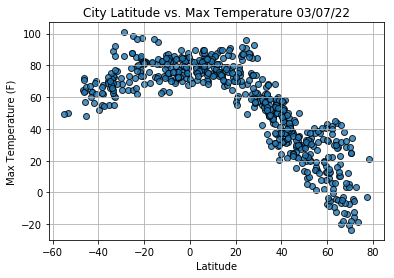

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

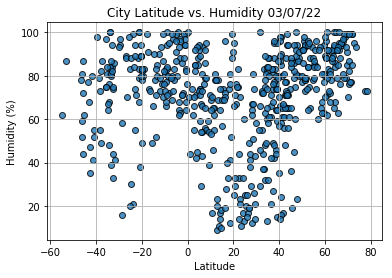

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

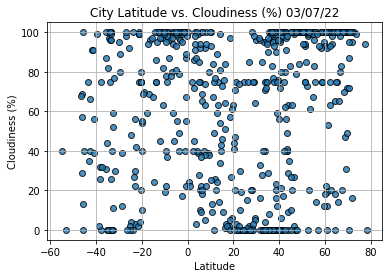

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

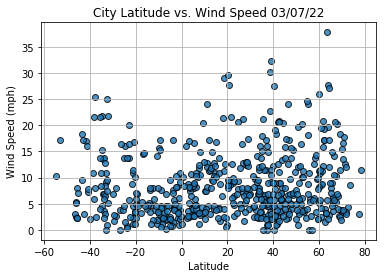

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

/Users/luzhernandez/opt/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/luzhernandez/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/luzhernandez/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


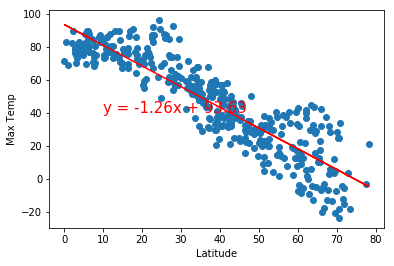

In [23]:
# Linear regression on the Northern Hemisphere

### find out why title is not appearing

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))


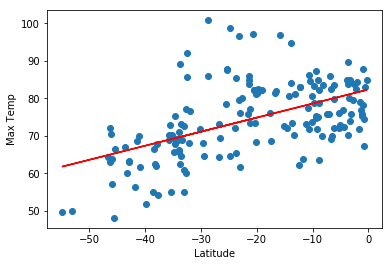

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-25,40))

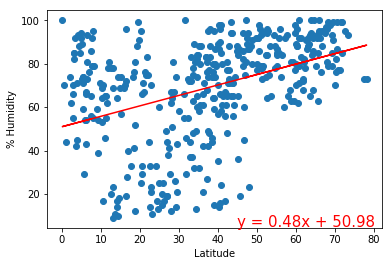

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# title = "Linear Regression on the Northern Hemisphere \n for % Humidity"
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(45,5))

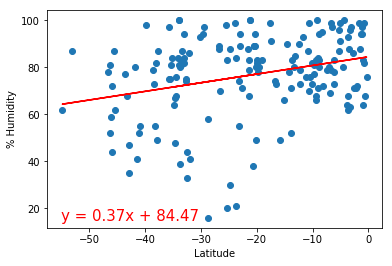

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# title = "Linear Regression on the Northern Hemisphere \n for % Humidity"
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-55,15))

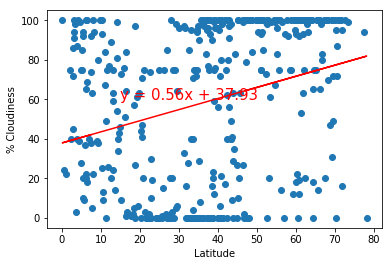

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(15,60))

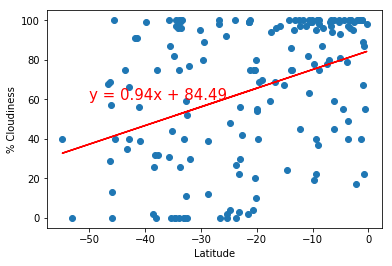

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

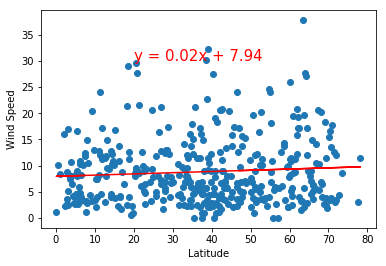

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,30))

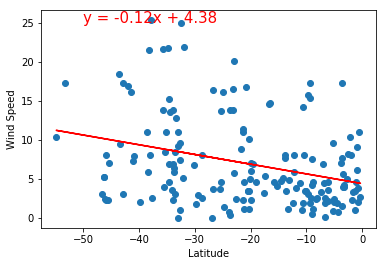

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))